In [1]:
import gzip
import codecs
import itertools
from scipy import integrate
from scipy.integrate import quad
import numpy as np
import time 
from PIL import Image
import matplotlib.pyplot as plt    
import matplotlib.colors as colors
from scipy.stats import poisson
from astroquery.gaia import Gaia
import math
import mpmath
from mpmath import mp

t0=time.time() #start time
#formulae for weighting schemes

def Z(f):
    '''relation between metallicity and [Fe/H]'''
    if f<-1.0:
        return f+0.1
    elif -1.0<=f<-0.5:
        return f-0.2*(f+0.5)
    else:
        return f


def E(m):
    '''Kroupa IMF'''
    if m<=0.08:
        return m**-0.3
    elif 0.08<m<=0.5:
        return m**-1.3
    elif m>0.5:
        return m**-2.3
       
def w(t,h,a,b,c):
    '''weight from age and metallicity'''
    if t>14.0:
        return 0.0
    elif 11.0<=t<=14.0:
        return 1.0
    elif t<11.0:
        if h<-0.9:
            return np.exp((t-11.0)/b)+c*np.exp(-(t-2.5)**2.0/2*4.0**2)
        elif -0.9<=h<=-0.5:
            if h==-0.9:
                return np.exp(t-11.0)*0.175*np.exp(1/(b+(a-b)*(0.9+h)/0.4))+c*np.exp(-(t-2.5)**2.0/2*4.0**2)
            else:
                return np.exp(t-11.0)*0.15*np.exp(1/(b+(a-b)*(0.9+h)/0.4))+c*np.exp(-(t-2.5)**2.0/2*4.0**2)
        else:
            return np.exp((t-11.0)/a)

base=np.full((93000,),10.0) #tranform logt into t

In [2]:
a=np.linspace(4.0,16.0,5)
b=np.linspace(0.5,2.5,3)
c=np.linspace(0.0,1.0,6)

In [3]:
#NotebookApp.iopub_data_rate_limit=10e9
#-3.20
data1= gzip.open('1all.tar.gz').read().decode()       
data=data1.split()

col = 1
row = 56
a1 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a1[n]=data[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a1[n]=data[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(14,56,1):
    a1[n]=data[45*(n+1)+2100*9+420*7*5+2100*7*(n-14):45*(n+1)+2100*9+420*7*5+2100*7*(n-13)]    

In [4]:
data1 = list(itertools.chain(*a1))

In [5]:
G1=np.array(data1[4::7],dtype=float)
m1a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m1=list(itertools.chain(*m1a))
logt1=np.array(data1[0::7],dtype=float)
bprp1=np.array(data1[5::7],dtype=float)-np.array(data1[6::7],dtype=float)

t1=np.power(base,logt1)/(10.0**9.0)  #change to Gyr

In [6]:
#Z=0.000050 #-2.50
gz2= gzip.open('2all.tar.gz').read().decode()       
d2=gz2.split()

col = 2100
row = 56
a2 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a2[n]=d2[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a2[n]=d2[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(14,56,1):
    a2[n]=d2[45*(n+1)+2100*9+420*7*5+2100*7*(n-14):45*(n+1)+2100*9+420*7*5+2100*7*(n-13)]

In [7]:
data2 = list(itertools.chain(*a2))

G2=np.array(data2[4::7],dtype=float)
m2a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m2=list(itertools.chain(*m2a))
logt2=np.array(data2[0::7],dtype=float)
bprp2=np.array(data2[5::7],dtype=float)-np.array(data2[6::7],dtype=float)

t2=np.power(base,logt2)/(10.0**9.0)

In [8]:
#-2.20
gz3= gzip.open('3all.tar.gz').read().decode()       
d3=gz3.split()

col = 2100
row = 56
a3 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a3[n]=d3[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a3[n]=d3[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(14,56,1):
    a3[n]=d3[45*(n+1)+2100*9+420*7*5+2100*7*(n-14):45*(n+1)+2100*9+420*7*5+2100*7*(n-13)]

In [9]:
data3 = list(itertools.chain(*a3))

G3=np.array(data3[4::7],dtype=float)
m3a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m3=list(itertools.chain(*m3a))
logt3=np.array(data3[0::7],dtype=float)
bprp3=np.array(data3[5::7],dtype=float)-np.array(data3[6::7],dtype=float)

t3=np.power(base,logt3)/(10.0**9.0)

In [10]:
#-1.90
gz4= gzip.open('4all.tar.gz').read().decode()       
d4=gz4.split()

col = 2100
row = 56
a4 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a4[n]=d4[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a4[n]=d4[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(14,56,1):
    a4[n]=d4[45*(n+1)+2100*9+420*7*5+2100*7*(n-14):45*(n+1)+2100*9+420*7*5+2100*7*(n-13)]

In [11]:
data4 = list(itertools.chain(*a4))

G4=np.array(data4[4::7],dtype=float)
m4a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m4=list(itertools.chain(*m4a))
logt4=np.array(data4[0::7],dtype=float)
bprp4=np.array(data4[5::7],dtype=float)-np.array(data4[6::7],dtype=float)

t4=np.power(base,logt4)/(10.0**9.0)

In [12]:
#-1.70
gz5= gzip.open('5all.tar.gz').read().decode()       
d5=gz5.split()

col = 2100
row = 56
a5 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a5[n]=d5[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,14,1):  #9-13
    a5[n]=d5[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(14,56,1):
    a5[n]=d5[45*(n+1)+2100*10+420*7*4+2100*7*(n-14):45*(n+1)+2100*10+420*7*4+2100*7*(n-13)]

In [13]:
data5 = list(itertools.chain(*a5))

G5=np.array(data5[4::7],dtype=float)
m5a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m5=list(itertools.chain(*m5a))
logt5=np.array(data5[0::7],dtype=float)
bprp5=np.array(data5[5::7],dtype=float)-np.array(data5[6::7],dtype=float)

base5=np.full(len(logt5),10.0)
t5=np.power(base5,logt5)/(10.0**9.0)

In [14]:
#-1.55
gz6= gzip.open('6all.tar.gz').read().decode()       
d6=gz6.split()

col = 2100
row = 56
a6 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a6[n]=d6[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a6[n]=d6[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(14,56,1):
    a6[n]=d6[45*(n+1)+2100*9+420*7*5+2100*7*(n-14):45*(n+1)+2100*9+420*7*5+2100*7*(n-13)]

In [15]:
data6 = list(itertools.chain(*a6))

G6=np.array(data6[4::7],dtype=float)
m6a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m6=list(itertools.chain(*m6a))
logt6=np.array(data6[0::7],dtype=float)
bprp6=np.array(data6[5::7],dtype=float)-np.array(data6[6::7],dtype=float)

base6=np.full(len(logt6),10.0)
t6=np.power(base6,logt6)/(10.0**9.0)

In [16]:
#-1.4
gz7= gzip.open('7all.tar.gz').read().decode()       
d7=gz7.split()

col = 2100
row = 56
a7 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-9
    a7[n]=d7[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,14,1):  #9-13
    a7[n]=d7[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*9+420*7*(n-9)]

for n in range(14,56,1):
    a7[n]=d7[45*(n+1)+2100*10+420*7*4+2100*7*(n-14):45*(n+1)+2100*10+420*7*4+2100*7*(n-13)]

In [17]:
data7 = list(itertools.chain(*a7))

G7=np.array(data7[4::7],dtype=float)
m7a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m7=list(itertools.chain(*m7a))
logt7=np.array(data7[0::7],dtype=float)
bprp7=np.array(data7[5::7],dtype=float)-np.array(data7[6::7],dtype=float)

base7=np.full(len(logt7),10.0)
t7=np.power(base7,logt7)/(10.0**9.0)

In [18]:
#-1.3
gz8= gzip.open('8all.tar.gz').read().decode()       
d8=gz8.split()

col = 2100
row = 56
a8 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-9
    a8[n]=d8[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,14,1):  #10-13
    a8[n]=d8[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*9+420*7*(n-9)]

for n in range(14,56,1):
    a8[n]=d8[45*(n+1)+2100*10+420*7*4+2100*7*(n-14):45*(n+1)+2100*10+420*7*4+2100*7*(n-13)]

In [19]:
data8 = list(itertools.chain(*a8))

G8=np.array(data8[4::7],dtype=float)
m8a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m8=list(itertools.chain(*m8a))
logt8=np.array(data8[0::7],dtype=float)
bprp8=np.array(data8[5::7],dtype=float)-np.array(data8[6::7],dtype=float)

base8=np.full(len(logt8),10.0)
t8=np.power(base8,logt8)/(10.0**9.0)

In [20]:
#-1.2
gz9= gzip.open('9all.tar.gz').read().decode()       
d9=gz9.split()

col = 2100
row = 56
a9 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a9[n]=d9[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,14,1):  #9-13
    a9[n]=d9[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(14,56,1):
    a9[n]=d9[45*(n+1)+2100*10+420*7*4+2100*7*(n-14):45*(n+1)+2100*10+420*7*4+2100*7*(n-13)]

In [21]:
data9 = list(itertools.chain(*a9))

G9=np.array(data9[4::7],dtype=float)
m9a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m9=list(itertools.chain(*m9a))
logt9=np.array(data9[0::7],dtype=float)
bprp9=np.array(data9[5::7],dtype=float)-np.array(data9[6::7],dtype=float)

base9=np.full(len(logt9),10.0)
t9=np.power(base9,logt9)/(10.0**9.0)

In [22]:
#-1.05
gz10= gzip.open('10all.tar.gz').read().decode()       
d10=gz10.split()

col = 2100
row = 56
a10 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a10[n]=d10[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,15,1):  #9-13
    a10[n]=d10[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(15,56,1):
    a10[n]=d10[45*(n+1)+2100*10+420*7*5+2100*7*(n-15):45*(n+1)+2100*10+420*7*5+2100*7*(n-14)]

In [23]:
data10 = list(itertools.chain(*a10))

G10=np.array(data10[4::7],dtype=float)
m10a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m10=list(itertools.chain(*m10a))
logt10=np.array(data10[0::7],dtype=float)
bprp10=np.array(data10[5::7],dtype=float)-np.array(data10[6::7],dtype=float)

base10=np.full(len(logt10),10.0)
t10=np.power(base10,logt10)/(10.0**9.0)

In [24]:
#-0.90
gz11= gzip.open('11all.tar.gz').read().decode()       
d11=gz11.split()

col = 2100
row = 56
a11 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a11[n]=d11[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,14,1):  #9-13
    a11[n]=d11[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(15,56,1):
    a11[n]=d11[45*(n+1)+2100*9+420*7*6+2100*7*(n-15):45*(n+1)+2100*9+420*7*6+2100*7*(n-14)]

In [25]:
data11 = list(itertools.chain(*a11))

G11=np.array(data11[4::7],dtype=float)
m11a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m11=list(itertools.chain(*m11a))
logt11=np.array(data11[0::7],dtype=float)
bprp11=np.array(data11[5::7],dtype=float)-np.array(data11[6::7],dtype=float)

base11=np.full(len(logt11),10.0)
t11=np.power(base11,logt11)/(10.0**9.0)

In [26]:
#-0.70
gz12= gzip.open('12all.tar.gz').read().decode()       
d12=gz12.split()

col = 2100
row = 56
a12 = [[0] * col for _ in range(row)]

for n in range(0,9,1):  #0-8
    a12[n]=d12[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(9,15,1):  #9-14
    a12[n]=d12[45*(n+1)+2100*9+420*7*(n-9):45*(n+1)+2100*9+420*7*(n-8)]

for n in range(15,56,1):
    a12[n]=d12[45*(n+1)+2100*9+420*7*6+2100*7*(n-15):45*(n+1)+2100*9+420*7*6+2100*7*(n-14)]

In [27]:
data12 = list(itertools.chain(*a12))

G12=np.array(data12[4::7],dtype=float)
m12a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*420,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m12=list(itertools.chain(*m12a))
logt12=np.array(data12[0::7],dtype=float)
bprp12=np.array(data12[5::7],dtype=float)-np.array(data12[6::7],dtype=float)

base12=np.full(len(logt12),10.0)
t12=np.power(base12,logt12)/(10.0**9.0)

In [28]:
#-0.60
gz13= gzip.open('13all.tar.gz').read().decode()       
d13=gz13.split()

col = 2100
row = 56
a13 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a13[n]=d13[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,15,1):  #9-13
    a13[n]=d13[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*9+420*7*(n-9)]

for n in range(15,56,1):
    a13[n]=d13[45*(n+1)+2100*10+420*7*5+2100*7*(n-15):45*(n+1)+2100*10+420*7*5+2100*7*(n-14)]

In [29]:
data13 = list(itertools.chain(*a13))

G13=np.array(data13[4::7],dtype=float)
m13a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m13=list(itertools.chain(*m13a))
logt13=np.array(data13[0::7],dtype=float)
bprp13=np.array(data13[5::7],dtype=float)-np.array(data13[6::7],dtype=float)

base13=np.full(len(logt13),10.0)
t13=np.power(base13,logt13)/(10.0**9.0)

In [30]:
#-0.40
gz14= gzip.open('14all.tar.gz').read().decode()       
d14=gz14.split()

col = 2100
row = 56
a14 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a14[n]=d14[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,14,1):  #9-13
    a14[n]=d14[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(15,56,1):
    a14[n]=d14[45*(n+1)+2100*10+420*7*5+2100*7*(n-15):45*(n+1)+2100*10+420*7*5+2100*7*(n-14)]

In [31]:
data14 = list(itertools.chain(*a14))

G14=np.array(data14[4::7],dtype=float)
m14a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*2100,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m14=list(itertools.chain(*m14a))
logt14=np.array(data14[0::7],dtype=float)
bprp14=np.array(data14[5::7],dtype=float)-np.array(data14[6::7],dtype=float)

base14=np.full(len(logt14),10.0)
t14=np.power(base14,logt14)/(10.0**9.0)

In [32]:
#-0.30
gz15= gzip.open('15all.tar.gz').read().decode()       
d15=gz15.split()

col = 2100
row = 56
a15 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a15[n]=d15[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,16,1):  #9-13
    a15[n]=d15[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(16,56,1):
    a15[n]=d15[45*(n+1)+2100*10+420*7*6+2100*7*(n-16):45*(n+1)+2100*10+420*7*6+2100*7*(n-15)]

In [33]:
data15 = list(itertools.chain(*a15))

G15=np.array(data15[4::7],dtype=float)
m15a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*420,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m15=list(itertools.chain(*m15a))
logt15=np.array(data15[0::7],dtype=float)
bprp15=np.array(data15[5::7],dtype=float)-np.array(data15[6::7],dtype=float)

base15=np.full(len(logt15),10.0)
t15=np.power(base15,logt15)/(10.0**9.0)

In [34]:
#-0.20
gz16= gzip.open('16all.tar.gz').read().decode()       
d16=gz16.split()

col = 2100
row = 56
a16 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a16[n]=d16[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,15,1):  #9-13
    a16[n]=d16[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(15,56,1):
    a16[n]=d16[45*(n+1)+2100*10+420*7*5+2100*7*(n-15):45*(n+1)+2100*9+420*7*5+2100*7*(n-14)]

In [35]:
data16 = list(itertools.chain(*a16))

G16=np.array(data16[4::7],dtype=float)
m16a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*2100,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m16=list(itertools.chain(*m16a))
logt16=np.array(data16[0::7],dtype=float)
bprp16=np.array(data16[5::7],dtype=float)-np.array(data16[6::7],dtype=float)

base16=np.full(len(logt16),10.0)
t16=np.power(base16,logt16)/(10.0**9.0)

In [36]:
#-0.08
gz17= gzip.open('17all.tar.gz').read().decode()       
d17=gz17.split()

col = 2100
row = 56
a17 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a17[n]=d17[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,16,1):  #9-13
    a17[n]=d17[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*9+420*7*(n-9)]

for n in range(16,56,1):
    a17[n]=d17[45*(n+1)+2100*10+420*7*6+2100*7*(n-16):45*(n+1)+2100*10+420*7*6+2100*7*(n-15)]

In [37]:
data17 = list(itertools.chain(*a17))

G17=np.array(data17[4::7],dtype=float)
m17a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*420,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m17=list(itertools.chain(*m17a))
logt17=np.array(data17[0::7],dtype=float)
bprp17=np.array(data17[5::7],dtype=float)-np.array(data17[6::7],dtype=float)

base17=np.full(len(logt17),10.0)
t17=np.power(base17,logt17)/(10.0**9.0)

In [38]:
#0.06
gz18= gzip.open('18all.tar.gz').read().decode()       
d18=gz18.split()

col = 2100
row = 56
a18 = [[0] * col for _ in range(row)]

for n in range(0,10,1):  #0-8
    a18[n]=d18[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(10,16,1):  #9-13
    a18[n]=d18[45*(n+1)+2100*10+420*7*(n-10):45*(n+1)+2100*10+420*7*(n-9)]

for n in range(16,56,1):
    a18[n]=d18[45*(n+1)+2100*10+420*7*6+2100*7*(n-16):45*(n+1)+2100*10+420*7*6+2100*7*(n-15)]

In [39]:
data18 = list(itertools.chain(*a18))

G18=np.array(data18[4::7],dtype=float)
m18a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*420,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*420,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m18=list(itertools.chain(*m18a))
logt18=np.array(data18[0::7],dtype=float)
bprp18=np.array(data18[5::7],dtype=float)-np.array(data18[6::7],dtype=float)

base18=np.full(len(logt18),10.0)
t18=np.power(base18,logt18)/(10.0**9.0)

In [40]:
#0.15
gz19= gzip.open('19all.tar.gz').read().decode()       
d19=gz19.split()

col = 2100
row = 56
a19 = [[0] * col for _ in range(row)]

for n in range(0,11,1):  #0-8
    a19[n]=d19[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(11,16,1):  #9-13
    a19[n]=d19[45*(n+1)+2100*11+420*7*(n-11):45*(n+1)+2100*11+420*7*(n-10)]

for n in range(16,56,1):
    a19[n]=d19[45*(n+1)+2100*11+420*7*5+2100*7*(n-16):45*(n+1)+2100*11+420*7*5+2100*7*(n-15)]

In [41]:
data19 = list(itertools.chain(*a19))

G19=np.array(data19[4::7],dtype=float)
m19a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*300,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*420,[0.80]*2100,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m19=list(itertools.chain(*m19a))
logt19=np.array(data19[0::7],dtype=float)
bprp19=np.array(data19[5::7],dtype=float)-np.array(data19[6::7],dtype=float)

base19=np.full(len(logt19),10.0)
t19=np.power(base19,logt19)/(10.0**9.0)

In [42]:
#0.30
gz20= gzip.open('20all.tar.gz').read().decode()       
d20=gz20.split()

col = 2100
row = 56
a20 = [[0] * col for _ in range(row)]

for n in range(0,11,1):  #0-8
    a20[n]=d20[45*(n+1)+2100*n:45*(n+1)+2100*(n+1)]

for n in range(11,17,1):  #9-13
    a20[n]=d20[45*(n+1)+2100*11+420*7*(n-11):45*(n+1)+2100*11+420*7*(n-10)]

for n in range(17,56,1):
    a20[n]=d20[45*(n+1)+2100*11+420*7*6+2100*7*(n-17):45*(n+1)+2100*11+420*7*6+2100*7*(n-16)]

In [43]:
data20 = list(itertools.chain(*a20))

G20=np.array(data20[4::7],dtype=float)
m20a=([0.10]*300,[0.12]*300,[0.15]*300,[0.18]*300,[0.20]*300,[0.25]*300,[0.30]*300,[0.35]*300,[0.40]*300,[0.45]*300,[0.50]*300,[0.55]*420,[0.60]*420,[0.65]*420,[0.70]*420,[0.75]*420,[0.80]*420,[0.90]*2100,[1.00]*2100,[1.10]*2100,[1.20]*2100,[1.30]*2100,[1.40]*2100,[1.50]*2100,[1.60]*2100,[1.70]*2100,[1.80]*2100,[1.90]*2100,[2.00]*2100,[2.10]*2100,[2.20]*2100,[2.30]*2100,[2.40]*2100,[2.50]*2100,[2.60]*2100,[2.80]*2100,[3.00]*2100,[3.50]*2100,[4.00]*2100,[4.50]*2100,[5.00]*2100,[5.50]*2100,[6.00]*2100,[6.50]*2100,[7.00]*2100,[7.50]*2100,[8.00]*2100,[8.50]*2100,[9.00]*2100,[9.50]*2100,[10.00]*2100,[11.00]*2100,[12.00]*2100,[13.00]*2100,[14.00]*2100,[15.00]*2100)
m20=list(itertools.chain(*m20a))
logt20=np.array(data20[0::7],dtype=float)
bprp20=np.array(data20[5::7],dtype=float)-np.array(data20[6::7],dtype=float)

base20=np.full(len(logt20),10.0)
t20=np.power(base20,logt20)/(10.0**9.0)

In [44]:
#put data together as one big array

G=np.concatenate([G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20],axis=0)

In [45]:
bprp=np.concatenate((bprp1,bprp2,bprp3,bprp4,bprp5,bprp6,bprp7,bprp8,bprp9,bprp10,bprp11,bprp12,bprp13,bprp14,bprp15,bprp16,bprp17,bprp18,bprp19,bprp20),axis=0,dtype=float)

In [46]:
t=np.concatenate((t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20),axis=0)

In [47]:
m=m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11+m12+m13+m14+m15+m16+m17+m18+m19+m20

In [48]:
Zm=([-3.197]*len(t1),[-2.498]*len(t2),[-2.197]*len(t3),[-1.900]*len(t4),[-1.700]*len(t5),[-1.550]*len(t6),[-1.401]*len(t7),[-1.300]*len(t8),[-1.200]*len(t9),[-1.050]*len(t10),[-0.900]*len(t11),[-0.700]*len(t12),[-0.601]*len(t13),[-0.401]*len(t14),[-0.300]*len(t15),[-0.200]*len(t16),[-0.080]*len(t17),[0.060]*len(t18),[0.150]*len(t19),[0.300]*len(t20))

In [49]:
Zm=list(itertools.chain(*Zm))

In [50]:
meta=[]
for i in range(0,len(Zm)):
    meta.append(Z(Zm[i]))

In [51]:
Dm=[]
for i in range(0,len(m)):
    if m[i]==0.10:
        Dm.append(np.abs(E(m[i])*0.02))
    elif m[i]==0.12 or m[i]==0.18:
        Dm.append(np.abs(E(m[i])*0.025))
    elif m[i]==0.15:
        Dm.append(np.abs(E(m[i])*0.030))
    elif m[i]==0.2:
        Dm.append(np.abs(E(m[i]))*0.035)
    elif 0.25<=m[i]<=0.75 or 3.5<=m[i]<=9.5:
        Dm.append(np.abs(E(m[i]))*0.05)
    elif m[i]==0.8:
        Dm.append(np.abs(E(m[i]))*0.075)
    elif 0.9<=m[i]<=2.5:
        Dm.append(np.abs(E(m[i]))*0.10)
    elif m[i]==2.6:
        Dm.append(np.abs(E(m[i]))*0.15)
    elif m[i]==2.8:
        Dm.append(np.abs(E(m[i]))*0.2)
    elif m[i]==3.0:
        Dm.append(np.abs(E(m[i]))*0.35)
    elif m[i]==10.0:
        Dm.append(np.abs(E(m[i]))*0.75)
    else:
        Dm.append(np.abs(E(m[i]))*1.0)

In [52]:
Dm=np.array(Dm,dtype=float)

In [53]:
P = [[[[0 for l in range(len(t))]for k in range(len(c))]for j in range(len(b))] for i in range(len(a))]

In [54]:
for n in range(0,len(t)):
    for i in range(0,len(a)):
        for j in range(0,len(b)):
            for k in range(0,len(c)):
                if 0<n<len(t)-1 and t[n]-t[n-1]>=0.0 and t[n+1]-t[n-1]>0.0:
                    P[i][j][k][n]=w(t[n],meta[n],a[i],b[j],c[k])*Dm[n]*(t[n]-t[n-1]+t[n+1]-t[n])/2
                elif n==0 or n>0 and t[n]-t[n-1]<0.0:
                    P[i][j][k][n]=(w(t[n],meta[n],a[i],b[j],c[k])*Dm[n]*(t[n+1]-t[n]))
                else:
                    P[i][j][k][n]=(w(t[n],meta[n],a[i],b[j],c[k])*Dm[n]*(t[n]-t[n-1]))

In [55]:
print('The largest value and smallest value of G are ',G.max(), 'and ', G.min(), '; and the largest value and smallest value of bprp colour are ', bprp.max(), 'and ',bprp.min())

The largest value and smallest value of G are  14.3882 and  -7.8171 ; and the largest value and smallest value of bprp colour are  4.887700000000001 and  -0.5500000000000003


In [56]:
#generate steps of bins for G and bprp

Gstep = (G.max()-G.min()+0.4)/50  #the constant is just to ensure that G and bprp have the same number of bins
bprpstep = (bprp.max()-bprp.min())/50

In [57]:
age=np.concatenate((t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20),axis=0)

In [58]:
#sort all G and bprp values into bins

Gbin = ((G - G.min()) // Gstep).astype(int)
bprpbin = ((bprp - bprp.min()) // bprpstep).astype(int)

In [59]:
weight=[[[0 for k in range(len(c))] for j in range(len(b))] for i in range(len(a))]

for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(0,len(c)):
                weight[i][j][k]= np.zeros_like(P[i][j][k], shape=(bprpbin.max() + 1, Gbin.max() + 1))
                np.add.at(weight[i][j][k], (bprpbin, Gbin), P[i][j][k])       

In [60]:
weight=np.array(weight,dtype=float)
weight=weight.reshape(len(a),len(b),len(c),2500)

In [61]:
print('There are ',Gbin.max()+1, 'bins for G and ',bprpbin.max()+1,'bins for bprp')

There are  50 bins for G and  50 bins for bprp


In [62]:
#generate an array of G bins

col = 1
row = 50
binsG = [[0] * col for _ in range(row)]

for i in range(0,50):
    binsG[i]=-7.8171+Gstep*i

In [63]:
binsg=np.array(binsG,dtype=float)

In [64]:
#generate an array of bprp bins

col = 1
row = 50
binsbprp = [[0] * col for _ in range(row)]

for i in range(0,50):
    binsbprp[i]=-0.5470000000000002+bprpstep*i

In [65]:
binsbprp=np.array(binsbprp,dtype=float)

In [66]:
#sorting 2d bins into one array to correspond to weight
#this is to tailor the code for colour scale plot

bprp1=[]
for i in range(0,len(binsbprp)):
    bprp1.append([binsbprp[i]]*len(binsg))

In [67]:
bprp1=list(itertools.chain(*bprp1))

In [68]:
g1=np.tile(binsg,len(binsbprp))  #values for y-axis in colour scale plot

In [69]:
#formula for the lines

y1=(2.5-0.5)/(15.0-5.0)
y2=(0.5-0.4)/(5.0-3.0)
y3=(0.4-0.6)/(3.0-2.0)
y4=(0.8-4.0)/(3.9-15.0)
y5=(0.8-1.2)/(3.9-3.8)

b1=2.5-15*y1
b2=0.5-5.0*y2
b3=0.4-3.0*y3
b4=0.8-3.9*y4
b5=0.8-3.9*y5

In [70]:
for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(0,len(c)):
            
            bprp=np.array(bprp1,dtype=float)
            g=np.array(g1,dtype=float)
            weight[i][j][k][((bprp<=(y1*g+b1))&(g<=15.0)&(g>=5.0))|((bprp<=(y2*g+b2))&(g>=3.0)&(g<5.0))|((bprp<=(y3*g+b3))&(g>=2.0)&(g<3.0))|((bprp>=(y4*g+b4))&(g>=3.9)&(g<=15.0))|((bprp>=(y5*g+b5))&(g>=3.8)&(g<3.9))|((bprp>=1.2)&(g>=2.0)&(g<3.8))|(g>=8.0)|(g<=2.0)]=0.0

In [71]:
#Gaia territory

tables = Gaia.load_tables(only_names=True)  #load gaia data

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [72]:
job = Gaia.launch_job("select top 1000000 "
                      "phot_g_mean_mag,parallax,parallax_error,parallax_over_error,bp_rp "
                      "from gaiadr2.gaia_source order by source_id") #select top 10000000 results from Gaia(?)
r = job.get_results()

In [73]:
print(job)

<Table length=1000000>
        name         dtype  unit          description          n_bad 
------------------- ------- ---- ----------------------------- ------
    phot_g_mean_mag float32  mag         G-band mean magnitude      0
           parallax float64  mas                      Parallax 141066
     parallax_error float64  mas    Standard error of parallax 141066
parallax_over_error float32      Parallax divided by its error 141066
              bp_rp float32  mag                BP - RP colour  54787
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1648068765311O-result.vot.gz
Results: None


In [74]:
#get bprp and G as arrays from gaia data
parallax=r['parallax']
d=1/parallax
distance=np.array(d,dtype=float)
parallax_error=r['parallax_error']
bprpgaia=np.array(r['bp_rp'],dtype=float)
apparent_magnitude=np.array(r['phot_g_mean_mag'],dtype=float)

In [75]:
absolute_magnitude=[]
bprpg=[]
for i in range(0,100000):
    if parallax[i]>=10.0*parallax_error[i] and parallax[i]>0:
        absolute_magnitude.append(apparent_magnitude[i]-5.0*np.log10(d[i]*100.0))
        bprpg.append(bprpgaia[i])

ggaia=np.array(absolute_magnitude,dtype=float)
bprpgaia=np.array(bprpg,dtype=float)

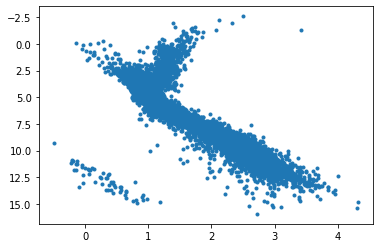

In [76]:
plt.scatter(bprpgaia,ggaia,marker='.')
plt.gca().invert_yaxis()

In [77]:
binsbprpgaia=np.append(binsbprp, (binsbprp[49]+bprpstep))

In [78]:
binsggaia=np.append(binsg, (binsg[49]+Gstep))

In [79]:
#sort gaia data into bins 

gaiahist=np.histogram2d(bprpgaia,ggaia,bins=(binsbprpgaia,binsggaia),density=False)[0]  #need to revise as hist gives len(bins)-1

In [80]:
weightgaia=[]
for i in range(0,len(binsbprpgaia)-1):
    for j in range(0,len(binsggaia)-1):
        weightgaia.append(gaiahist[i][j])

In [81]:
weightgaia=np.array(weightgaia,dtype=float)

In [82]:
weightgaia[((bprp<(y1*g+b1))&(g<=15.0)&(g>=5.0))|((bprp<(y2*g+b2))&(g>=3.0)&(g<5.0))|((bprp<(y3*g+b3))&(g>=2.0)&(g<3.0))|((bprp>(y4*g+b4))&(g>=3.9)&(g<=15.0))|((bprp>(y5*g+b5))&(g>=3.8)&(g<3.9))|((bprp>1.2)&(g>=2.0)&(g<3.8))|(g>8.0)|(g<=2.0)]=0 #cut on the colour magnitude plane

In [83]:
for k in range(0,len(c)):
    for i in range(0,len(a)):
        for j in range(0,len(b)):
            weight[i][j][k]=weight[i][j][k]*np.sum(weightgaia)/np.sum(weight[i][j][k])

In [84]:
L=[[[[0 for l in range(2500)] for k in range(len(c))] for j in range(len(b))] for i in range(len(a))]

In [85]:
mp.dps=20

for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(0,len(c)):
            for n in range(0,2500):
                L[i][j][k][n]=(mp.power(weight[i][j][k][n],weightgaia[n])*math.exp(-weight[i][j][k][n]))/mp.gamma(weightgaia[n]+1)           

In [86]:
logL=[[[0 for l in range(len(c))]for k in range(len(b))] for j in range(len(a))]

for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(len(c)):
            logL[i][j][k]=np.log(np.prod(np.array(L[i][j][k],dtype=float)+10**-4.0))

In [87]:
logL=np.array(logL,dtype=float)
logL = np.reshape(logL, (len(a), len(b),len(c)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z,y,x=np.meshgrid(b,a,c)
img = ax.scatter(x, y, z, c=logL, cmap='RdGy')
fig.colorbar(img, pad=0.2).set_label('logL')
ax.set_xlabel('c')
ax.set_ylabel('a')
ax.set_zlabel('b')
plt.title('Log likelihood with Gaussian peak, with c between 0.0 and 1.0')
plt.savefig('colour plot with Gaussian peaks with c below 1')

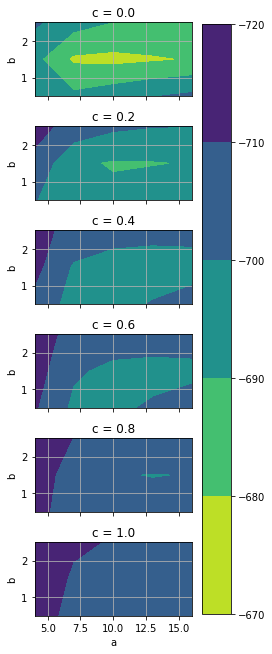

In [88]:
c=([0.0,0.2,0.4,0.6,0.8,1.0])

fig, axes = plt.subplots(len(c), 1, figsize=(3.5, 9), 
                         sharex=True,sharey=True)
for i, (ax, d) in enumerate(zip(axes, logL.swapaxes(0, 2))):
    img=ax.contourf(a, b, d, levels=[-720.0,-710.0,-700.0,-690.0,-680.0,-670.0])
    ax.set_ylabel('b')
    ax.grid()
    ax.set_title(f"c = {c[i]}")
    plt.tight_layout()
axes[-1].set_xlabel('a')
fig.colorbar(img, ax=axes.ravel().tolist())
#plt.tight_layout()
plt.show()
fig.savefig('Gaussian peak',bbox_inches = 'tight')

In [89]:
c_sum=np.exp(logL).reshape(15,6)

In [90]:
c__sum=c_sum.sum(axis=0)

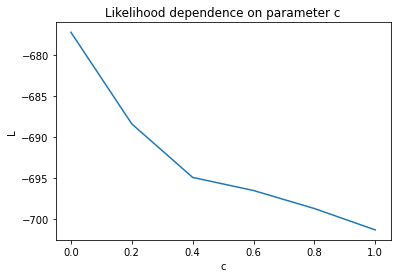

In [91]:
mp.dps=20
plt.plot(c,np.log(c__sum))

plt.title('Likelihood dependence on parameter c')
plt.xlabel('c')
plt.ylabel('L')
plt.savefig('Likelihood dependence on parameter c')

In [92]:
time.time()-t0  #housekeeping: how long did it take the software to run

1412.2322890758514